<a href="https://colab.research.google.com/github/superpanditas/TrueHome/blob/main/jamones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __*Desafio: Para hacer la de Jamon*__

#### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [1]:
! git clone https://github.com/superpanditas/TrueHome.git

Cloning into 'TrueHome'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 34 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [4]:
jamones = pd.read_csv('/content/TrueHome/score_de_jamonosidad.csv')

#### Review Dataset

__*Some of the problems that we can noted*__
    <li> Inbalanced Data </li>
    <li> Few Data </li>

In [5]:
jamones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jamon   28 non-null     int64  
 1   score   28 non-null     int64  
 2   v1      28 non-null     int64  
 3   v2      28 non-null     float64
 4   v3      28 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


In [6]:
jamones.columns

Index(['jamon', 'score', 'v1', 'v2', 'v3'], dtype='object')

In [7]:
col = ['score', 'v1', 'v2', 'v3']

__*Calculating media by score for each variable to plotting and see if we can find a correlation*__

In [8]:
jam = jamones.loc[:, col].groupby('score').agg({
                               'v1': np.median
                              ,'v2': np.median  
                              ,'v3': np.median
                              }).round(2)
jam.reset_index(inplace=True)

__*We can noted a correlation between variables and score*__

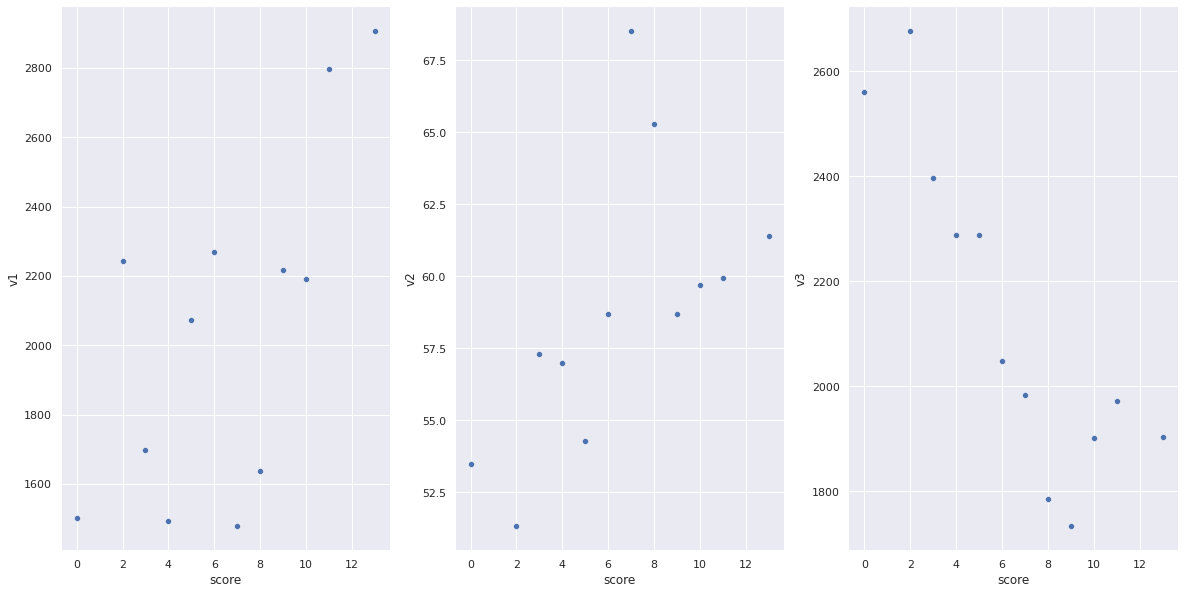

In [9]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(20,10))
# plot (1,1)
plt.subplot(1,3,1)
sns.scatterplot(x='score', y='v1', data=jam)
sns.despine(left=True, bottom=True)

# plot(1,2)
plt.subplot(1,3,2)
sns.scatterplot(x='score', y='v2', data=jam)
sns.despine(left=True, bottom=True)

# plot(1,3)
plt.subplot(1,3,3)
sns.scatterplot(x='score', y='v3', data=jam)
sns.despine(left=True, bottom=True)

__*Correlation between v2 and v3 variables*__

Text(0.5, 1.0, 'Correlation of')

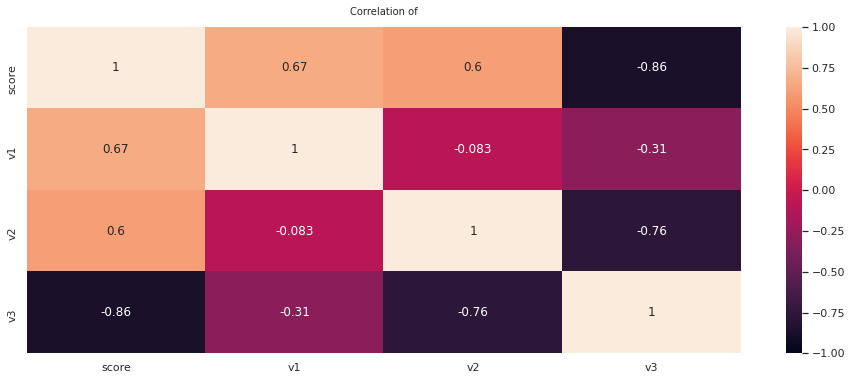

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(jam.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation of", fontdict={'fontsize':10}, pad=12)

__*Two variables have a good distributions*__

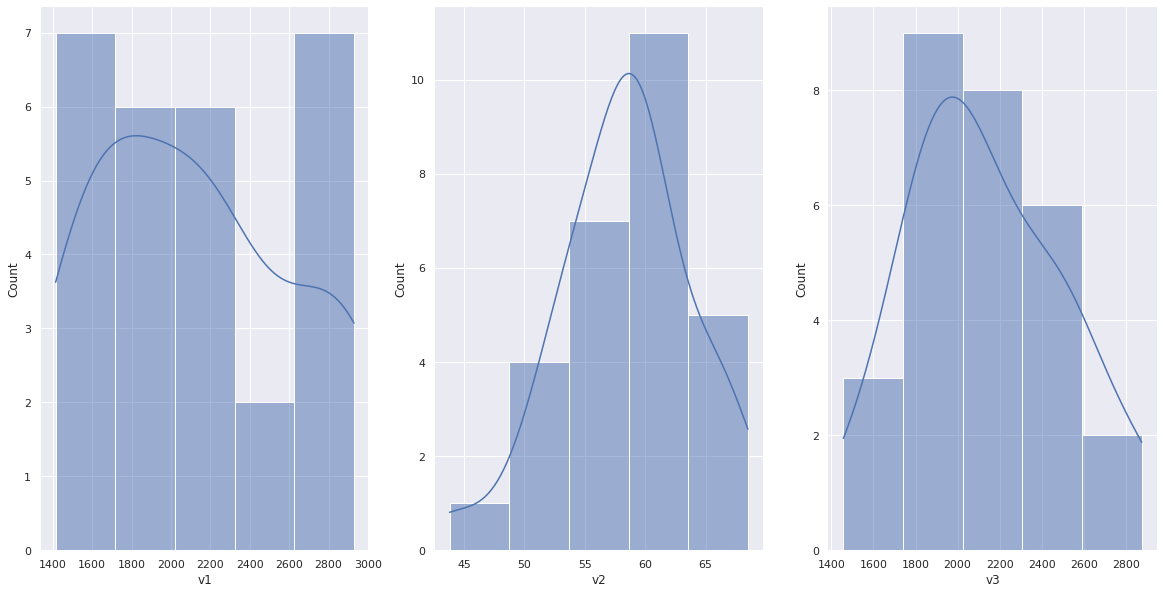

In [11]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(20,10))

# plot (1,1)
plt.subplot(1,3,1)
sns.histplot(x='v1', bins=5, kde=True, data=jamones)
sns.despine(left=True, bottom=True)

# plot(1,2)
plt.subplot(1,3,2)
sns.histplot(x='v2', bins=5, kde=True, data=jamones)
sns.despine(left=True, bottom=True)

# plot(2,1)
plt.subplot(1,3,3)
sns.histplot(x='v3', bins=5, kde=True, data=jamones)
sns.despine(left=True, bottom=True)

__*We can see in a plot how is distributed our classes*__

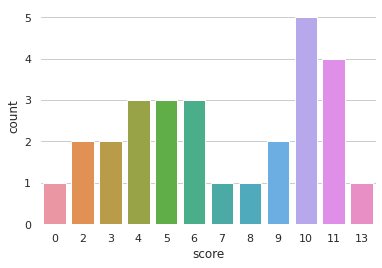

In [12]:
sns.set(style="whitegrid")
sns.countplot(x='score', data=jamones)
sns.despine(left=True, bottom=True)

#### Using a SMOTE technique for have a balanced data